<a href="https://colab.research.google.com/github/kschuler/analyses/blob/master/2019_07_12_acqvar_plural_universals_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Katie initial pass at analysis of acqvar plural universals


Yiran had collected the initial subjects (10 in each condition) for AcqVar Plural Universals. I just did a quick analysis of these participants to get us started / off the ground.

Created on 2019-07-12.

In [0]:
library(readr)
library(tidyr)
library(dplyr)
library(knitr)
library(ggplot2)



In [0]:
# theme to add to all plots
THEME_KDS <- theme_classic(base_size = 10) +
    theme(axis.line.y = element_line(colour = 'black', size=0.5, linetype='solid'),
          axis.line.x = element_line(colour = 'black', size=0.5, linetype='solid'),
    axis.ticks.x = element_blank())

theme_set(THEME_KDS)

In [0]:
# read in the coded data file
coded_data <- read_csv('acqvar-plural-universals-coded-data - Sheet1 (2).csv')


In [0]:
# how many participants are in each condition?
n_participants <- group_by(coded_data, condition) %>%
  summarise(n_subjs = n_distinct(random_id))

n_participants %>% kable



| condition| n_subjs|
|---------:|-------:|
|         1|      13|
|         2|      20|
|         3|      22|
|         4|      20|
|         5|      20|
|         6|      19|
|         7|      21|
|         8|      20|

In [0]:
# check that each participant only participated in one study
participant_trials <- group_by(coded_data, sid) %>%
  summarise(n_trials = n(), n_conditions = n_distinct(condition), n_rand_ids = n_distinct(random_id)) 
  
participant_trials %>% kable



|sid                      | n_trials| n_conditions| n_rand_ids|
|:------------------------|--------:|------------:|----------:|
|559744acfdf99b590e1e9299 |       18|            1|          1|
|55a75835fdf99b26395fae40 |       18|            1|          1|
|562a4f41c8ffc20005513ca6 |       18|            1|          1|
|5687eddc369319000526e722 |       18|            1|          1|
|56a14872e1e5a6000d8f90d7 |       18|            1|          1|
|56fc4f4f490b8200092f1668 |       18|            1|          1|
|57341f38b0b6ee1ab88e094c |       18|            1|          1|
|57c725d89a5f4f0001f661bd |       18|            1|          1|
|57e9e3d10cb6700001dd9028 |       18|            1|          1|
|5847399f75d2b20001fd446f |       18|            1|          1|
|585aefed73f2620001c21d75 |       18|            1|          1|
|587e553943773c0001cb0879 |       18|            1|          1|
|588cb0617a845a0001b11f11 |       18|            1|          1|
|58913d344a4e4300019c4a74 |       18| 

In [0]:
# check which of participant 5bdcd0de703cd5000103924a was run first
coded_data %>% filter(sid == '5bdcd0de703cd5000103924a') %>%
  group_by(random_id, date_run) %>%
  summarise(n()) %>% kable



|random_id |date_run            | n()|
|:---------|:-------------------|---:|
|ck5ypbh4  |2019-07-11 14:43:26 |  18|
|u8uzyzhv  |2019-07-11 14:32:55 |  18|

In [0]:
# remove 'bad' participants and add a column for whether the participant chose 'ka' or null
processed_data <- filter(coded_data, !(sid %in% c("5cc08aa4d923cf0016ea55a5") & !(random_id %in% c("ck5ypbh4"))))%>%
  mutate(choice=ifelse(grepl('ka', button_choice), 'ka', 'null')) %>%
  mutate(number_cat=ifelse(number=='1', 'singular', 'plural'))

head(processed_data, 10) %>% kable




|   rt|stimulus                       | button_pressed|exp_phase |animate |meaning     |noun  | number|marker |noun_r |choices                         |trial_type            | trial_index| time_elapsed|internal_node_id |date_run            | exp_id|sid                      |random_id | condition|language |button_choice    | trial_n|choice |number_cat |
|----:|:------------------------------|--------------:|:---------|:-------|:-----------|:-----|------:|:------|:------|:-------------------------------|:---------------------|-----------:|------------:|:----------------|:-------------------|------:|:------------------------|:---------|---------:|:--------|:----------------|-------:|:------|:----------|
| 2014|static/images/cow5.png         |              0|test      |TRUE    |cow         |noun1 |      5|NA     |clidam |gentif clidam ka,gentif clidam  |image-button-response |         220|       692330|0.0-5.0-0.0      |2019-07-11 14:49:32 |   1510|58b77e6e012bb000015777db |gtd413xv  |  

Look at things overall (not by animacy)

In [0]:
# get the proportion ka for each participant for singular and plural
data <- processed_data %>% mutate(animate = ifelse(animate == TRUE, 'animate', 'inanimate')) %>%
  mutate(condition = recode_factor(condition, '1' = "100-100", '2' = "100-50", '3' = "100-0",
                                              '4' = "50-100", '5' = "50-50", '6' = "50-0",
                                              '7' = "0-100", '8' = "0-50" )) %>%
  group_by(condition, random_id, number_cat, animate, choice) %>%
  summarise(n = n()) %>%
  spread(choice, n, fill=0) %>%
  mutate(n_trials=ifelse(number_cat=='plural', 6, 3)) %>%
  mutate(pcnt_ka = ka/n_trials) 
  

data_plural <- filter(data, number_cat == 'plural') %>%
  select(condition, random_id, number_cat, animate, pcnt_ka) %>%
  spread(animate, pcnt_ka, drop=TRUE) 





|condition |random_id |number_cat |animate   | ka| null| n_trials|   pcnt_ka|
|:---------|:---------|:----------|:---------|--:|----:|--------:|---------:|
|100-100   |649oo0kk  |plural     |animate   |  6|    0|        6| 1.0000000|
|100-100   |649oo0kk  |plural     |inanimate |  6|    0|        6| 1.0000000|
|100-100   |649oo0kk  |singular   |animate   |  0|    3|        3| 0.0000000|
|100-100   |649oo0kk  |singular   |inanimate |  0|    3|        3| 0.0000000|
|100-100   |7bw82c2t  |plural     |animate   |  6|    0|        6| 1.0000000|
|100-100   |7bw82c2t  |plural     |inanimate |  6|    0|        6| 1.0000000|
|100-100   |7bw82c2t  |singular   |animate   |  0|    3|        3| 0.0000000|
|100-100   |7bw82c2t  |singular   |inanimate |  0|    3|        3| 0.0000000|
|100-100   |b3xosodg  |plural     |animate   |  6|    0|        6| 1.0000000|
|100-100   |b3xosodg  |plural     |inanimate |  6|    0|        6| 1.0000000|
|100-100   |b3xosodg  |singular   |animate   |  0|    3|      

In [0]:
data_plural_sum <- data %>% filter(number_cat == "plural") %>%
  group_by(condition, animate) %>%
  summarise(mean_ka = mean(pcnt_ka))
  
data_plural_sum %>% kable



|condition |animate   |   mean_ka|
|:---------|:---------|---------:|
|100-100   |animate   | 1.0000000|
|100-100   |inanimate | 1.0000000|
|100-50    |animate   | 0.8916667|
|100-50    |inanimate | 0.7666667|
|100-0     |animate   | 0.9015152|
|100-0     |inanimate | 0.1893939|
|50-100    |animate   | 0.7250000|
|50-100    |inanimate | 0.8500000|
|50-50     |animate   | 0.6333333|
|50-50     |inanimate | 0.6083333|
|50-0      |animate   | 0.3947368|
|50-0      |inanimate | 0.1403509|
|0-100     |animate   | 0.2000000|
|0-100     |inanimate | 0.9166667|
|0-50      |animate   | 0.2250000|
|0-50      |inanimate | 0.4916667|

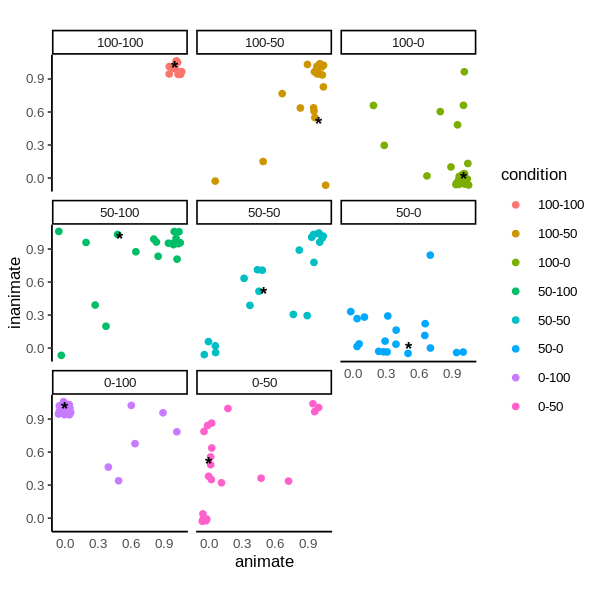

In [0]:
options(repr.plot.width = 5, repr.plot.height = 5)

input = data.frame(animate = c(1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0, 0),
                   inanimate = c(1.0, 0.5, 0, 1.0, 0.5, 0, 1.0, 0.5),
                   condition = c("100-100", "100-50", "100-0", "50-100", "50-50", "50-0", "0-100", "0-50"),
                   lab = c("*", "*", "*", "*", "*", "*", "*", "*"))

ggplot(data = data_plural) + 
  geom_point(mapping = aes(x = animate, y = inanimate, color = condition), position="jitter")+
  coord_fixed() +
  geom_text(data = input, aes(x = animate,  y = inanimate, label = lab, fontface="bold")) +
  facet_wrap(.~condition) 
   

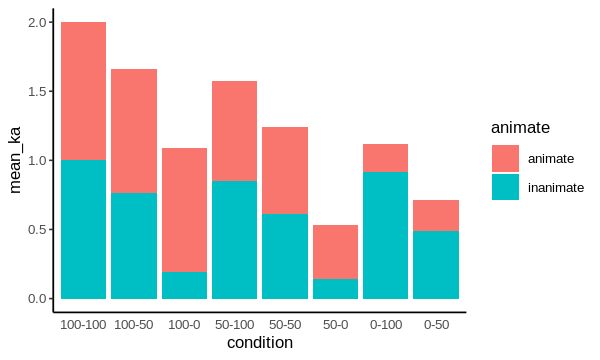

In [0]:
options(repr.plot.width = 5, repr.plot.height = 3)

ggplot(data = data_plural_sum) +
  geom_bar(aes(y = mean_ka, x = condition, fill = animate),
           stat="identity")




In [0]:
data_2, aes(x = animate, y = inanimate, fill = condition)) +
  facet_wrap(. ~ condition) +
  geom_dotplot(binaxis = "y", stackdir = "center", binwidth = 0.03) +
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.5)


In [0]:
options(repr.plot.width = 8, repr.plot.height = 8)

ggplot(data = data_2) + 
  geom_point(mapping = aes(x = animate, y = inanimate, color= as.factor(condition)), position="jitter")+
  coord_fixed() +
  facet_wrap(.~condition)


In [0]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(filter(data, number_cat == 'singular'), aes(x = animate, y = pcnt_ka, fill = animate)) +
  facet_grid(. ~ condition) +
  geom_dotplot(binaxis = "y", stackdir = "center", binwidth = 0.03) +
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.5) +
  coord_cartesian(ylim = c(0, 1)) +
  xlab("Animate") +
  ylab("Usage of ka") +
  ggtitle("Usage of ka on singular trials")

In [0]:
data %>% filter(number_cat == "plural") %>%
  group_by(condition, animate) %>%
  summarize(n_subjs = n(), mean_ka = mean(pcnt_ka), sd_ka = sd(pcnt_ka)) %>%
  kable